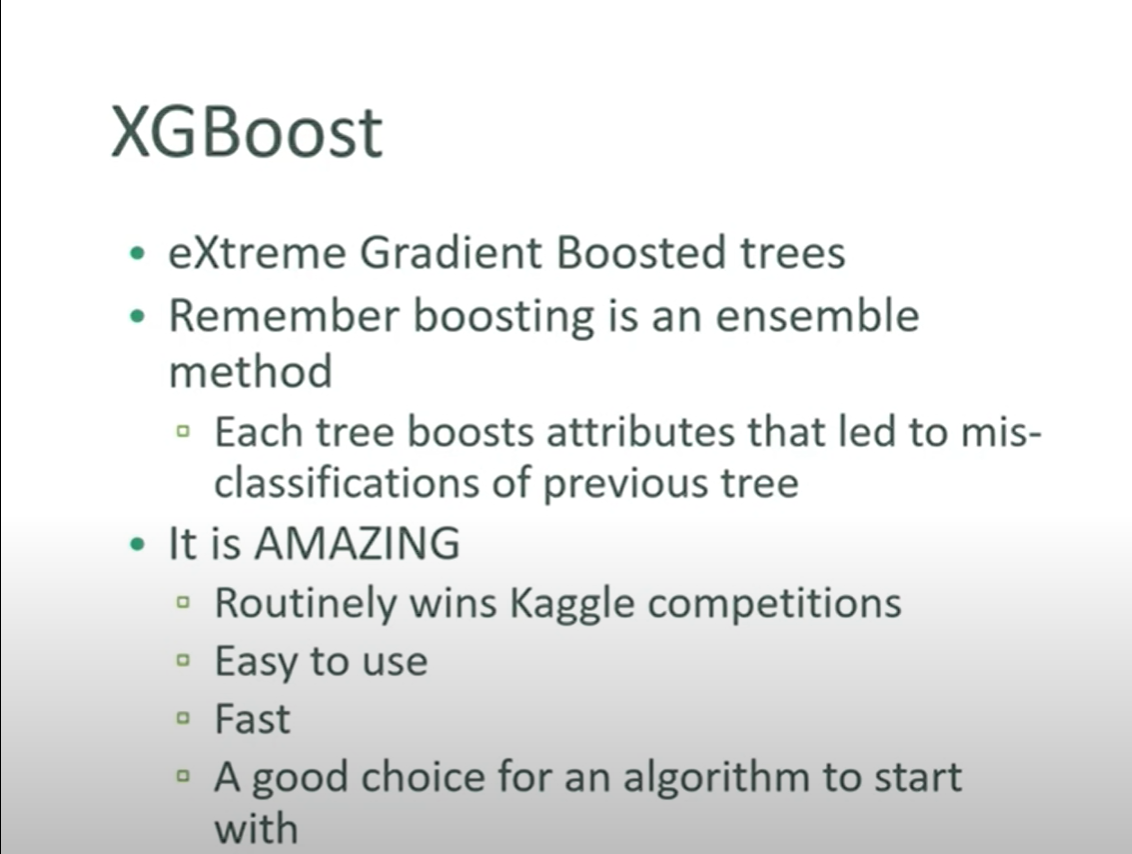

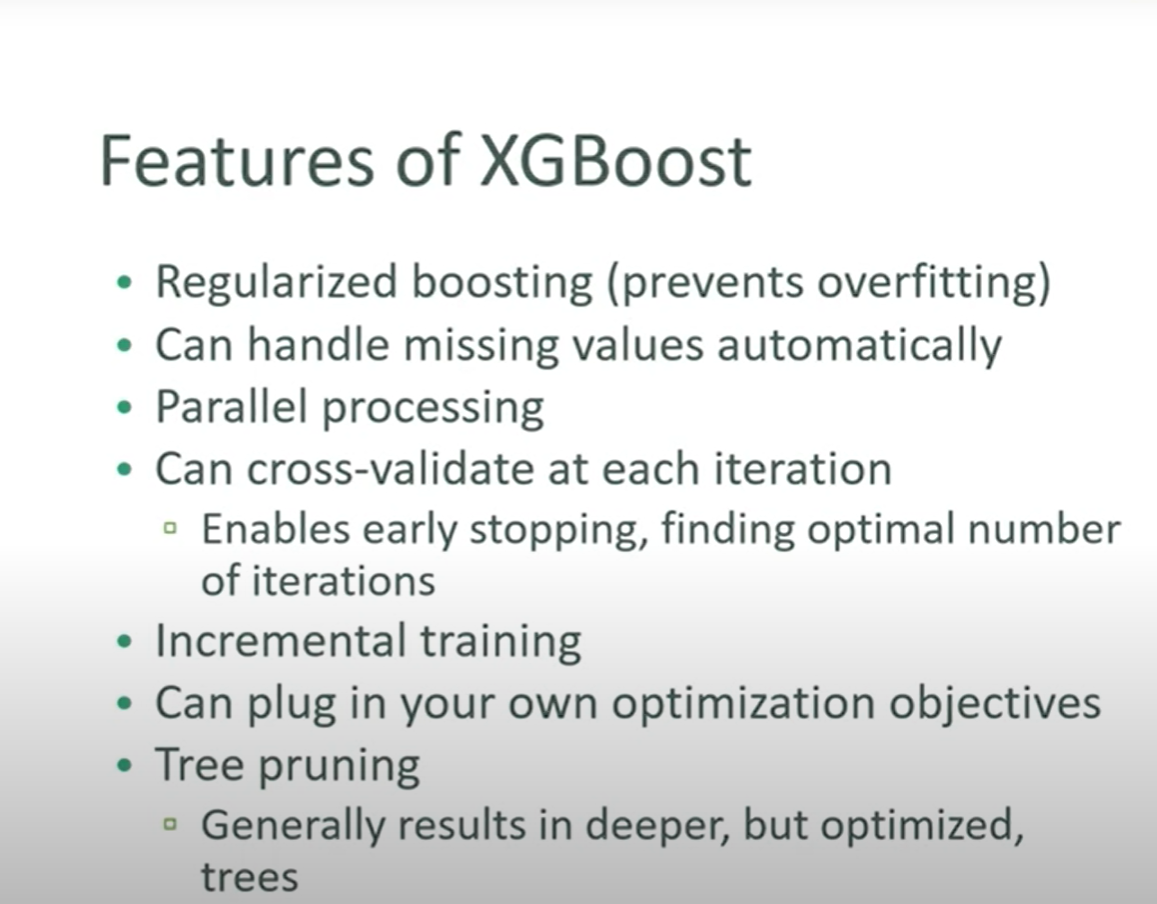

## Speed Wise

***No Language Barrier***

***Portable means can be run on any platform***

***Easy For Integrating In Cloud***

***Cache Optimization***

***Out Of Memory Computation means it can work on data larger than the size of the ram***



## Performance Wise

***Regularization***

***Auto Pruning Means it will not allow decission tree to go beyond limit***


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno
import sklearn
import plotly.express as px

from sklearn.model_selection import train_test_split

In [2]:
Train_dataset = pd.read_csv("Train (1).csv")
Test_dataset = pd.read_csv("Test (1).csv")

***dropping Unnessacary Columns***

In [3]:
Train_dataset.drop("ID",axis = 1,inplace = True)

In [4]:
Train_dataset

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              NaN   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No            NaN              0.0   
8064    Male           No   35        No      Executive              3.0   
8065  Female           No   33       Yes     Healthcare              1.0   
8066  Female           No   27       Yes     Healthcare              1.0   
8067    Male          Yes   37       Yes      Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          4.0  Cat_4            D  
1           Average          3.0  Cat_4            A  
2               Low          1.0  Cat_6            B  
3              High          2.0  Cat_6            B  
4              High          6.0  Cat_6            A  
...             ...          ...    ...          ...  
8063            Low          7.0  Cat_1            D  
8064            Low          4.0  Cat_4            D  
8065            Low          1.0  Cat_6            D  
8066            Low          4.0  Cat_6            B  
8067        Average          3.0  Cat_4            B  

[8068 rows x 10 columns]

## EXPLORING THE DATA

In [5]:
NumCols = [x for x in Train_dataset.columns if Train_dataset[x].dtypes!="object"]

In [6]:
For_corr = Train_dataset[NumCols]

In [7]:
corr = For_corr.corr()

In [8]:
corr

Age  Work_Experience  Family_Size
Age              1.000000        -0.190789    -0.280517
Work_Experience -0.190789         1.000000    -0.063234
Family_Size     -0.280517        -0.063234     1.000000

<Axes: >

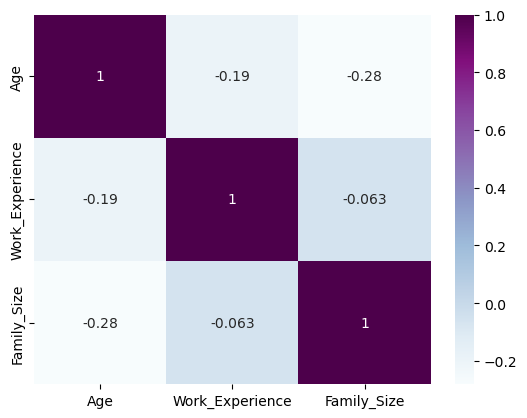

In [9]:
# All corr is in neg so there is no correlation among the colums
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

In [10]:
plot_data = Train_dataset.groupby("Segmentation")["Segmentation"].agg(["count"]).reset_index()

In [11]:
plot_data

Segmentation  count
0            A   1972
1            B   1858
2            C   1970
3            D   2268

In [12]:
fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Segmentation'])
fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))
fig.update_layout(title_text = 'Customer<br>Segmentation', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)              
fig.show()

***Function for plotting different categorcial features affect on target variable (Segmentation)***


In [13]:
def plot_pie(feature,df=None):
    data = df
    plot_data = data.groupby([feature,"Segmentation"])[feature].agg({"count"}).reset_index()
    fig = px.sunburst(plot_data,path = [feature,"Segmentation"],values = "count",color = feature,title = "Affect of %s on customer Segmentaion"%feature,width = 600,height = 600)
    fig.update_layout(plot_bgcolor = "white",title_font_family = "Calibri Black",title_font_color = '#221f1f',title_font_size = 22,title_x = 0.5)
    fig.update_traces(textinfo = "label + percent parent")
    fig.show()

Observations

Ever_Married - UnMarried customers are usually in segment D while married are in segment A, B or C

Graduated - Graduated customers are usually in segment A, B or C while Ungraduated are in segment D

Spending_Score - Usually 'Low' spenders are in segment A or D while 'high' and 'average' spenders are in segment B or C

In [14]:
for feature in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
    plot_pie(feature, df=Train_dataset)

***Functions for plotting different numerical features affect on target variable (Segmentation)***


In [15]:
def plot_numerical(feature,figsize = None,df = None):
    data = df
    fig = plt.figure(figsize = (10,6))
    
    sns.kdeplot(data[data["Segmentation"] == "A"][feature])
    sns.kdeplot(data[data["Segmentation"] == "B"][feature])
    sns.kdeplot(data[data["Segmentation"] == "C"][feature])
    sns.kdeplot(data[data["Segmentation"] == "D"][feature])
    
    fig.legend(labels = ["Segmentation A","Segmentation B","Segmentation C","Segmentation D"])
    plt.title("Based on %s"%feature)
    plt.show()

***OBSERVATION***

Age - <30 are in segment D, 30-40 or >70 are in segment A while 45-70 are in segment C

Work_Experience - <2 are in segment C while 6-11 are in segment A & D

Family_Size - <1 are in segment A, 1-3 are in Segment C and 4+ in segment D

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use is

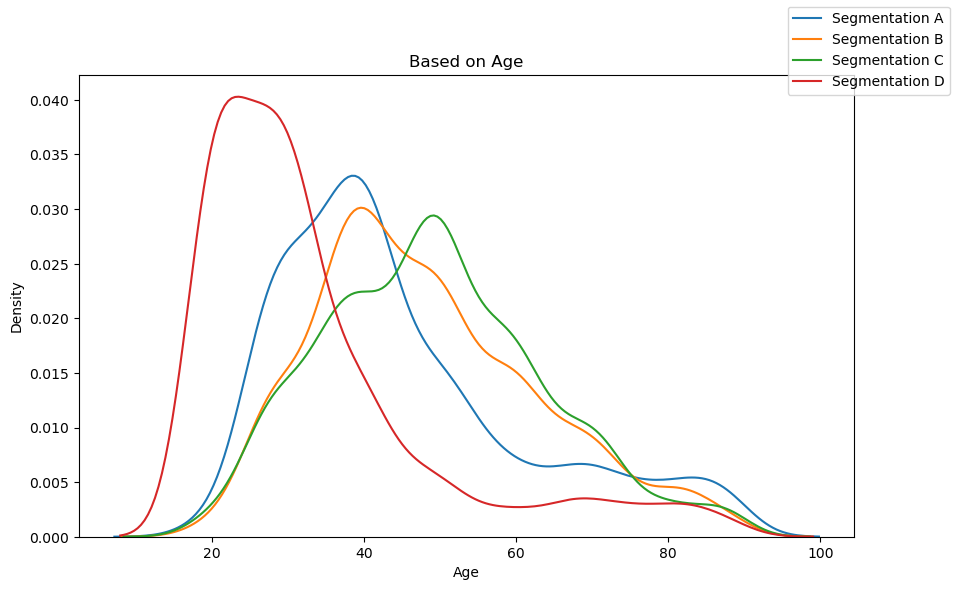

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use is

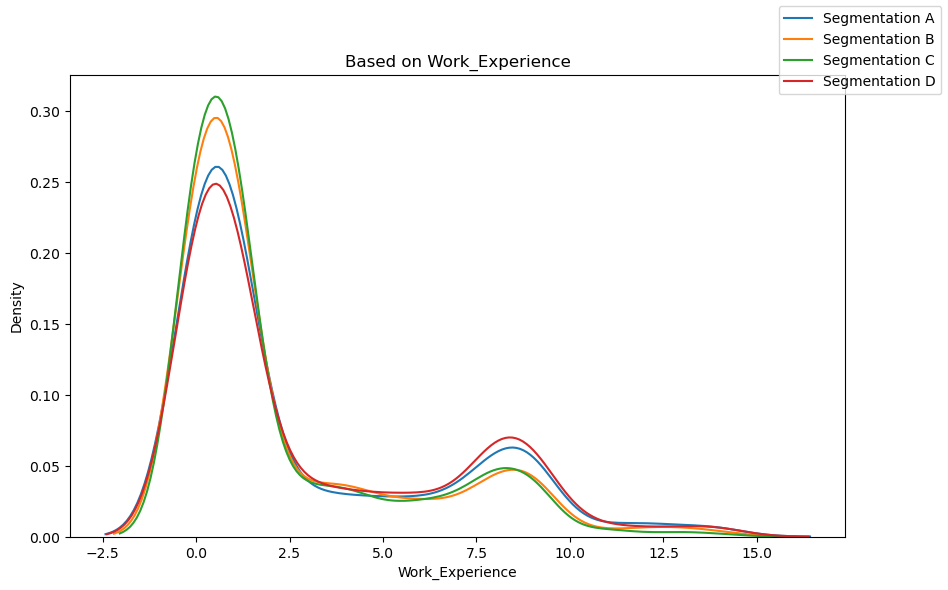

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use is

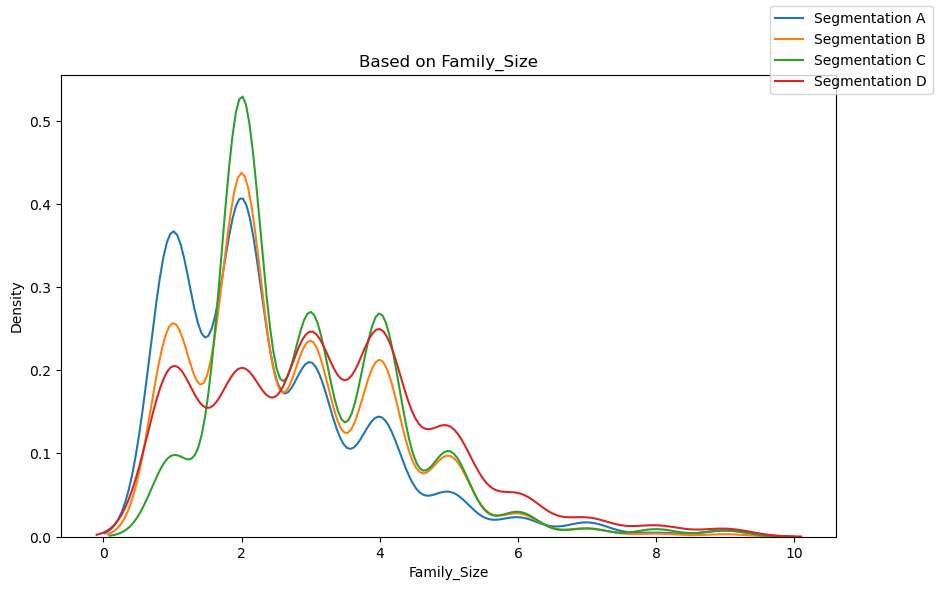

In [16]:
for feature in NumCols:
    plot_numerical(feature,df = Train_dataset)

# DATA PREPARATION

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

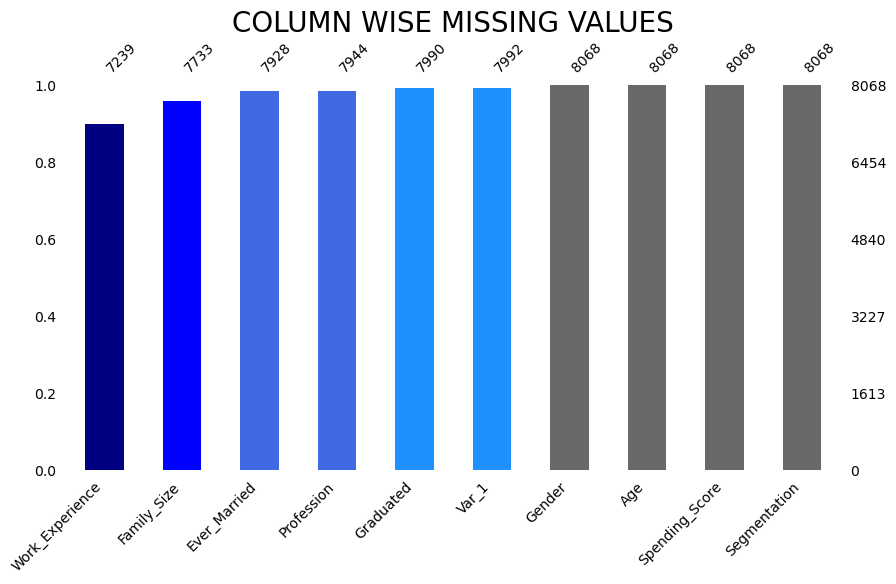

In [17]:
# AS THERE ARE MISSING VALUES BUT NOT MUCH SO WE ARE DROPPING IT RATHER THEN IMPUTING IT 

# No value Missing is less then 20%

colors= ['navy','blue','royalblue','royalblue','dodgerblue','dodgerblue','dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey']
msno.bar(Train_dataset,fontsize=10, color=colors, figsize=(10,5), sort='ascending')
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

In [18]:
Train_dataset.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [19]:
Train_dataset.dropna(inplace = True)

In [20]:
Train_dataset

Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0       Male           No   22        No  Healthcare              1.0   
2     Female          Yes   67       Yes    Engineer              1.0   
3       Male          Yes   67       Yes      Lawyer              0.0   
5       Male          Yes   56        No      Artist              0.0   
6       Male           No   32       Yes  Healthcare              1.0   
...      ...          ...  ...       ...         ...              ...   
8062    Male          Yes   41       Yes      Artist              0.0   
8064    Male           No   35        No   Executive              3.0   
8065  Female           No   33       Yes  Healthcare              1.0   
8066  Female           No   27       Yes  Healthcare              1.0   
8067    Male          Yes   37       Yes   Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          4.0  Cat_4            D  
2               Low          1.0  Cat_6            B  
3              High          2.0  Cat_6            B  
5           Average          2.0  Cat_6            C  
6               Low          3.0  Cat_6            C  
...             ...          ...    ...          ...  
8062           High          5.0  Cat_6            B  
8064            Low          4.0  Cat_4            D  
8065            Low          1.0  Cat_6            D  
8066            Low          4.0  Cat_6            B  
8067        Average          3.0  Cat_4            B  

[6665 rows x 10 columns]

# Labels/predictors separation¶

In [21]:
y = Train_dataset.Segmentation
X = Train_dataset.drop(['Segmentation'], axis=1, inplace=False)

# Data Transformation 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures


In [23]:
# LETS observe number of categories in each categorical columns

In [24]:
CatCols = [x for  x in Train_dataset.columns if Train_dataset[x].dtypes == "object"]

In [25]:
for ColName in Train_dataset[CatCols]:
    print("{} = {}".format(ColName,len(Train_dataset[ColName].unique())))

Gender = 2
Ever_Married = 2
Graduated = 2
Profession = 9
Spending_Score = 3
Var_1 = 7
Segmentation = 4


In [26]:
NumCols = [x for x in Train_dataset.columns if Train_dataset[x].dtypes!="object"]

In [27]:
Cat_features = X.columns.difference(NumCols)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

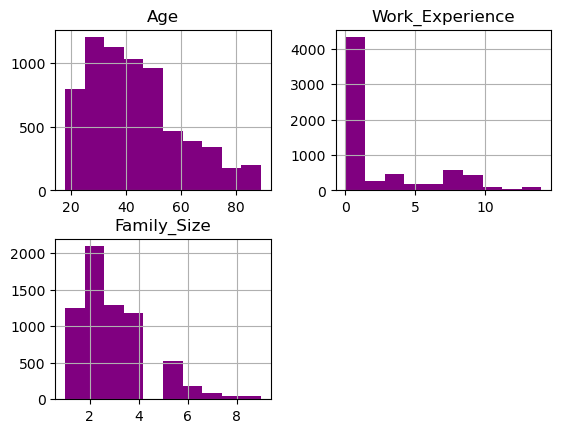

In [28]:
#plotting Numcols for checking there scales
X[NumCols].hist(color = 'purple')
plt.tight_layout

In [29]:
# we are making are own data transformer as it will fit and transform both in a single function

from sklearn.base import BaseEstimator,TransformerMixin

In [30]:
class FeatureTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,key):
        self.key = key
        
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.key]

In [31]:
cat_feat = Pipeline([
    ('selector',FeatureTransformer(key = Cat_features)),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

num_feat = Pipeline([
    ('selector',FeatureTransformer(key = NumCols)),
    ('poluynom_feature',PolynomialFeatures(degree = 3 , include_bias = False)),
    ('std_scaler',StandardScaler())
    
    
])

In [35]:
# Bundle Processing for numerical and categorical data
feature_processing = FeatureUnion([
    ("cat_feat",cat_feat),
    ("num_feat",num_feat)
])
X = feature_processing.fit_transform(X)
y = y.map({'A':0,"B":1,"C":2,"D":3})

validation_size = 0.25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = validation_size,random_state = 0,stratify = y)

# MODELLING

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [77]:
#Evalution Function
def eval_model(model,X_train,X_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    print("Train metrics.....")
    print(confusion_matrix(y_train,y_pred)) 
    print(classification_report(y_train,y_pred))
    
    y_pred = model.predict(X_test)
    print("Validation metrics ...")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    

def acc_score(model,X_train,X_test):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    print(f"Test_Score: {train_score} \n Test_Score : {test_score}")

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

LR = LogisticRegression()

In [79]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],  # Ensure that the solver is compatible with the penalty
    'max_iter': [100, 200, 300],
}

# Initialize Logistic Regression
LR = LogisticRegression()

# Setup RandomizedSearchCV
clf1 = RandomizedSearchCV(LR, param_distributions=param_grid, cv=5, verbose=True, n_jobs=-1, error_score=0.0)


In [80]:
clf1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score=0.0, estimator=LogisticRegression(),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'saga']},
                   verbose=True)

In [81]:
best_model = clf1.best_estimator_
best_model.predict(X_test)

array([3, 2, 2, ..., 2, 1, 1], dtype=int64)

In [82]:
eval_model(LR,X_train,X_test)

Train metrics.....
[[599 183 229 201]
 [309 310 447 113]
 [147 175 821 147]
 [285  68  60 904]]
              precision    recall  f1-score   support

           0       0.45      0.49      0.47      1212
           1       0.42      0.26      0.32      1179
           2       0.53      0.64      0.58      1290
           3       0.66      0.69      0.67      1317

    accuracy                           0.53      4998
   macro avg       0.51      0.52      0.51      4998
weighted avg       0.52      0.53      0.52      4998

Validation metrics ...
[[214  60  71  59]
 [115  99 135  44]
 [ 44  51 286  49]
 [108  22  16 294]]
              precision    recall  f1-score   support

           0       0.44      0.53      0.48       404
           1       0.43      0.25      0.32       393
           2       0.56      0.67      0.61       430
           3       0.66      0.67      0.66       440

    accuracy                           0.54      1667
   macro avg       0.52      0.53      0.52

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier()

In [85]:
# Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
# Making models with hyper parameters sets
clf2 = RandomizedSearchCV(knn, param_distributions=params, n_jobs=1)

# Just fit
clf2.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 5],
                                        'n_jobs': [-1],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']})

In [86]:
# The best hyper parameters set
print("Best Hyper Parameters:\n",clf2.best_params_)
# Choose best parameters combination
model2 = clf2.best_estimator_

Best Hyper Parameters:
 {'weights': 'uniform', 'n_neighbors': 7, 'n_jobs': -1, 'leaf_size': 3, 'algorithm': 'auto'}


In [87]:
# Check accuracy
acc_score(model2, X_train, X_test)

Test_Score: 0.6094437775110044 
 Test_Score : 0.4829034193161368


In [88]:
eval_model(model2, X_train, X_test)

Train metrics.....
[[763 175 130 144]
 [254 538 288  99]
 [140 199 827 124]
 [273  66  60 918]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      1212
           1       0.55      0.46      0.50      1179
           2       0.63      0.64      0.64      1290
           3       0.71      0.70      0.71      1317

    accuracy                           0.61      4998
   macro avg       0.61      0.61      0.60      4998
weighted avg       0.61      0.61      0.61      4998

Validation metrics ...
[[203  82  56  63]
 [106 101 141  45]
 [ 48  96 237  49]
 [110  40  26 264]]
              precision    recall  f1-score   support

           0       0.43      0.50      0.47       404
           1       0.32      0.26      0.28       393
           2       0.52      0.55      0.53       430
           3       0.63      0.60      0.61       440

    accuracy                           0.48      1667
   macro avg       0.47      0.48      0.47

In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [94]:
params = {
    'booster': 'gbtree',               # using tree booster
    'silent': 1,                       # silent mode (deprecated, use verbosity)
    'verbosity': 1,                    # verbosity level
    'nthread': 4,                      # number of parallel threads
    'eta': 0.3,                        # learning rate
    'gamma': 0,                        # minimum loss reduction
    'max_depth': 6,                    # maximum depth of tree
    'min_child_weight': 1,             # minimum sum of instance weight in a child
    'max_delta_step': 0,               # maximum delta step
    'subsample': 0.8,                  # subsample ratio of the training instance
    'colsample_bytree': 0.8,           # subsample ratio of columns when constructing each tree
    'colsample_bylevel': 0.8,          # subsample ratio of columns for each split, in each level
    'colsample_bynode': 0.8,           # subsample ratio of columns for each split
    'lambda': 1,                       # L2 regularization term on weights
    'alpha': 0,                        # L1 regularization term on weights
    'tree_method': 'auto',             # tree construction algorithm
    'scale_pos_weight': 1,             # balance of positive and negative weights
    'objective': 'binary:logistic',    # binary classification objective
    'eval_metric': 'logloss',          # evaluation metric
    'seed': 42,                        # random number seed
    'gpu_id': 0,                       # GPU id if using GPU
    'updater': 'grow_gpu_hist',        # GPU updater if using GPU
    'sample_type': 'uniform',          # DART booster sample type
    'normalize_type': 'tree',          # DART booster normalization type
    'rate_drop': 0.1,                  # dropout rate
    'skip_drop': 0.5                   # probability of skipping dropout
}


In [97]:
# num_round = 100

# # Train the model
# bst = xgb.fit(params, X_train, num_round)

# # Predict
# preds = bst.predict(X_test)
# predictions = [round(value) for value in preds]
